In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
from sklearn.linear_model import BayesianRidge, LinearRegression
%matplotlib inline

随机函数的种子

In [2]:
np.random.seed(int(time.time()) % 100)

样本数目和特征数目

In [3]:
n_samples, n_features = 100, 100

生成正态分布 

In [4]:
X = np.random.randn(n_samples, n_features)

首先使用alpha为4的先验分布

In [5]:
sigma = 4.
w = np.zeros(n_features)

随机提取10个特征出来作为样本特征

In [6]:
relevant_features = np.random.randint(0, n_features, 10)

基于先验分布，产生特征对应的初始权值

In [7]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(sigma))

产生alpha为50的噪声

In [8]:
sigma = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(sigma), size=n_samples)

产生目标数据

In [9]:
y = np.dot(X, w) + noise

使用贝叶斯脊回归拟合数据

In [16]:
clf = BayesianRidge()
clf.fit(X, y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

使用最小二乘法拟合数据

In [17]:
ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

作图比较两个方法的结果

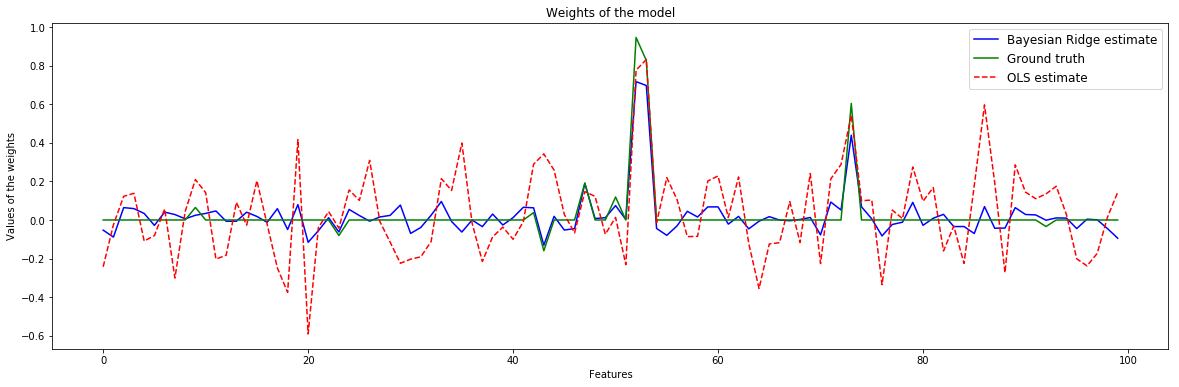

In [18]:
plt.figure(figsize=(20, 6))
plt.title("Weights of the model")
plt.plot(clf.coef_, 'b-', label="Bayesian Ridge estimate")
plt.plot(w, 'g-', label="Ground truth")
plt.plot(ols.coef_, 'r--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.show()

贝叶斯线性回归的模型权重更接近于0